In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def softmax(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of scores.    
    Z: a numpy array of shape (N, C)
    return a numpy array of shape (N, C)
    """
    e_z = np.exp(Z)
    A = e_z / e_z.sum(axis=1, keepdims=True)
    return A

def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each row of Z is a set of scores.    
    """
    e_z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    A = e_z / e_z.sum(axis=1, keepdims=True)
    return A

def softmax_loss(X, y, W):
    """
    W: 2d numpy array of shape (d, C), 
        each column correspoding to one output node
    X: 2d numpy array of shape (N, d), each row is one data point
    y: 1d numpy array -- label of each row of X 
    """
    A = softmax_stable(X.dot(W))
    id0 = range(X.shape[0])
    return -np.mean(np.log(A[id0, y]))

def softmax_grad(X, y, W):
    """
    W: 2d numpy array of shape (d, C), 
        each column correspoding to one output node
    X: 2d numpy array of shape (N, d), each row is one data point
    y: 1d numpy array -- label of each row of X 
    """
    A = softmax_stable(X.dot(W))
    id0 = range(X.shape[0])
    A[id0, y] -= 1
    return X.T.dot(A) / X.shape[0]

def softmax_fit(X, y, W, lr=0.01, nepoches = 100, tol=1e-5, batch_size=10):
    W_old = W.copy()
    ep = 0
    loss_hist = [softmax_loss(X, y, W)] # store history of loss 
    N = X.shape[0]
    nbatches = int(np.ceil(N/batch_size))
    while ep < nepoches:
        ep += 1
        mix_ids = np.random.permutation(N) # mix data 
        for i in range(nbatches):
            batch_ids = mix_ids[batch_size*i : min(batch_size*(i+1), N)]
            X_batch, y_batch = X[batch_ids], y[batch_ids]
            W = W - lr*softmax_grad(X_batch, y_batch, W)
        loss_hist.append(softmax_loss(X, y, W))
        if np.linalg.norm(W - W_old) / W.size < tol:
            break
        W_old = W
    return W, loss_hist

def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(X.dot(W))
    return np.argmax(A, axis=1)

In [22]:
C = 5    # number of classes
N = 500  # number of points per class 
means = [[2, 2], [8, 3], [3, 6], [14, 2], [12, 8]]
cov = [[1, 0], [0, 1]]

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)
X4 = np.random.multivariate_normal(means[4], cov, N)

X = np.concatenate((X0, X1, X2, X3, X4), axis = 0) # each row is a datapoint
Xbar = np.concatenate((X, np.ones((X.shape[0], 1))), axis = 1) # bias trick 

y = np.asarray([0]*N + [1]*N + [2]*N+ [3]*N + [4]*N)

W_init = np.random.randn(Xbar.shape[1], C)
W, loss_hist = softmax_fit(Xbar, y, W_init, batch_size = 10, nepoches = 100, lr = 0.05)

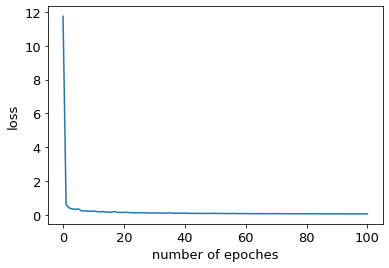

In [23]:
plt.plot(loss_hist)
plt.xlabel('number of epoches', fontsize=13)
plt.ylabel('loss', fontsize=13)
# pdf.savefig(bbox_inches='tight')
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()


In [24]:
xm = np.arange(-2, 18, 0.025)
xlen = len(xm)
ym = np.arange(-3, 11, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

xx1 = xx.ravel().reshape(-1, 1)
yy1 = yy.ravel().reshape(-1, 1)

XX = np.concatenate(( xx1, yy1, np.ones(( xx.size, 1))), axis = 1)
Z = pred(W, XX)

In [25]:
def display(X, label):
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'co', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'gs', markersize = 4, alpha = .8)
    plt.plot(X3[:, 0], X3[:, 1], 'y.', markersize = 4, alpha = .8)
    plt.plot(X4[:, 0], X4[:, 1], 'r*', markersize = 4, alpha = .8)
    # plt.axis('off')
    plt.plot()

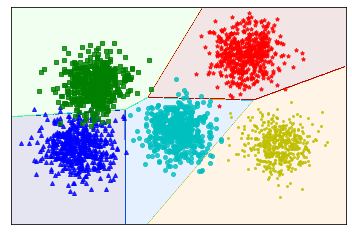

In [26]:
Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha=.1)

plt.xlim(-2, 18)
plt.ylim(-3, 11)
plt.xticks(())
plt.yticks(())
# plt.axis('equal')
display(X, y)
plt.savefig('softmax_5class', bbox_inches='tight', dpi=400)
plt.show()


# MNIST

In [21]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
mnist = fetch_openml('mnist_784')

X = mnist.data.values
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

model = LogisticRegression(C=1e5,
                           solver='lbfgs', multi_class='multinomial')  # C is inverse of lam
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy %.2f %%" % (100*accuracy_score(y_test, y_pred)))


Accuracy 92.11 %


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


one-vs-rest logistic regression

In [27]:
model = LogisticRegression(C=1e5,
                           solver='lbfgs', multi_class='ovr')  # C is inverse of lam
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy %.2f %%" % (100*accuracy_score(y_test, y_pred.tolist())))


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 91.54 %
